In [1]:
import pandas as pd                                  # Importing Necessary Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings                    
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("ChurnPrediction.csv")

In [3]:
data # Displaying data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.isnull().sum() # Checking NULL values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
data.drop_duplicates(inplace = True) # Drop duplicates if any 
data.shape

(7043, 21)

In [7]:
data.drop(columns=['customerID'], inplace=True) # Drop column 'customerID' as it does not contribute anything

In [8]:
data # Checking if the column was dropped

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
data.drop_duplicates(inplace = True) # Drop duplicates if any 
data.shape

(7021, 20)

In [10]:
# Displaying all the unique values in the categorical columns
columns=["gender","SeniorCitizen","Partner","Dependents","MultipleLines","PhoneService","InternetService","OnlineSecurity","OnlineBackup",
        "DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod","Churn"]
unique={}
for i in columns:
    print(i)
    unique[i]=data[i].unique()
    print(unique[i])
    print("\n")

gender
['Female' 'Male']


SeniorCitizen
[0 1]


Partner
['Yes' 'No']


Dependents
['No' 'Yes']


MultipleLines
['No phone service' 'No' 'Yes']


PhoneService
['No' 'Yes']


InternetService
['DSL' 'Fiber optic' 'No']


OnlineSecurity
['No' 'Yes' 'No internet service']


OnlineBackup
['Yes' 'No' 'No internet service']


DeviceProtection
['No' 'Yes' 'No internet service']


TechSupport
['No' 'Yes' 'No internet service']


StreamingTV
['No' 'Yes' 'No internet service']


StreamingMovies
['No' 'Yes' 'No internet service']


Contract
['Month-to-month' 'One year' 'Two year']


PaperlessBilling
['Yes' 'No']


PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


Churn
['No' 'Yes']




In [11]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce') # Changing Object data type to float

In [12]:
data['TotalCharges'].info() # Checking if it has any NULL Values

<class 'pandas.core.series.Series'>
Int64Index: 7021 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7010 non-null   float64
dtypes: float64(1)
memory usage: 109.7 KB


In [13]:
data['TotalCharges'].describe() # Check the mean

count    7010.000000
mean     2290.353388
std      2266.820832
min        18.800000
25%       408.312500
50%      1403.875000
75%      3807.837500
max      8684.800000
Name: TotalCharges, dtype: float64

In [14]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce').fillna(2290) #Replacing the missing values with mean

In [15]:
data['TotalCharges'].info() # Checking if there are any missing values now

<class 'pandas.core.series.Series'>
Int64Index: 7021 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7021 non-null   float64
dtypes: float64(1)
memory usage: 109.7 KB


In [16]:
data.info() # Verifying if all columns' datatypes are consistent

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


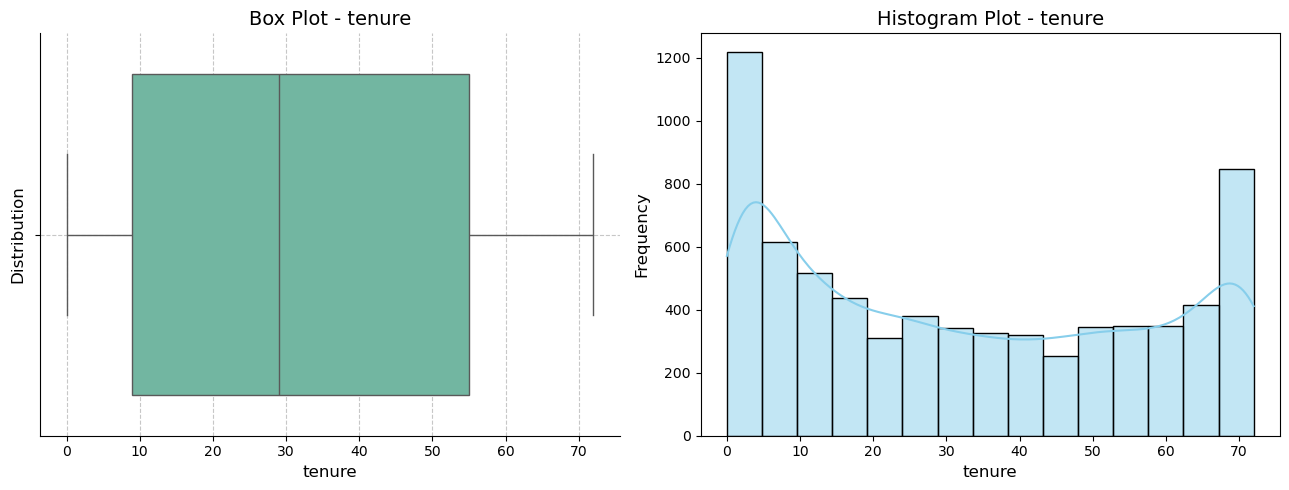

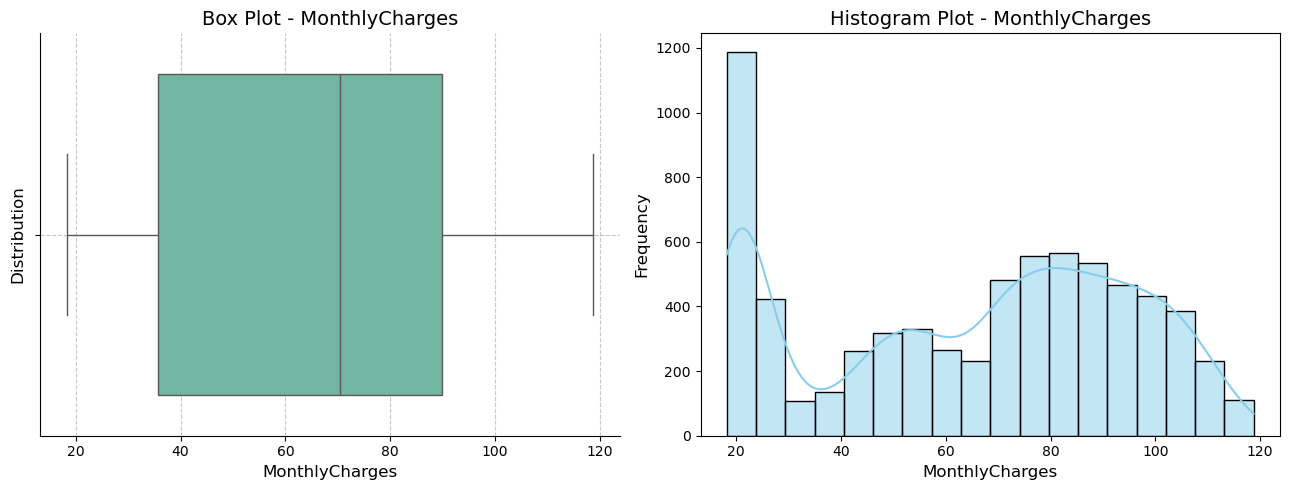

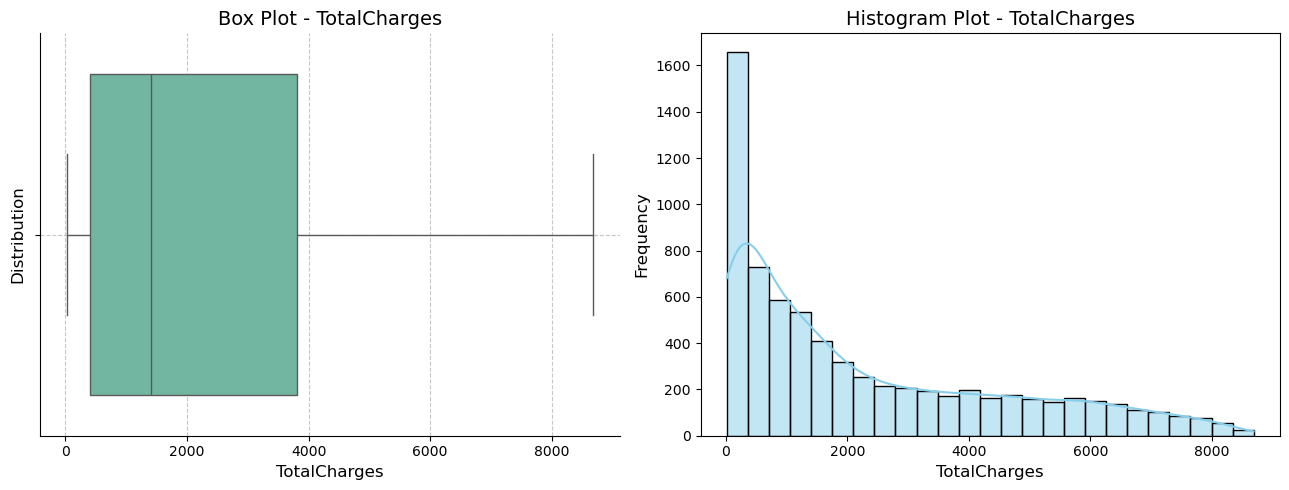

In [17]:
columns1 = ['tenure', 'MonthlyCharges', 'TotalCharges']

for each in columns1:
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

    # Box Plot 
    sns.boxplot(x=each, data=data, ax=ax1, palette="Set2")
    ax1.set_xlabel(each, fontsize=12)  
    ax1.set_ylabel("Distribution", fontsize=12)  
    ax1.set_title(f"Box Plot - {each}", fontsize=14)  
    ax1.tick_params(labelsize=10)

    # Customize the appearance of the Box plot
    sns.despine(ax=ax1) 
    ax1.grid(True, linestyle='--', alpha=0.7) 

    # Histogram
    sns.histplot(data=data, x=each, kde=True, ax=ax2, color="skyblue") 
    ax2.set_xlabel(each, fontsize=12)
    ax2.set_ylabel("Frequency", fontsize=12)  
    ax2.set_title(f"Histogram Plot - {each}", fontsize=14)
    ax2.tick_params(labelsize=10)

    # Adjust layout for better spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

## Label Encoding

In [18]:
data['gender'] = data['gender'].map({'Female': 0, 'Male': 1})
data['gender'].unique()

array([0, 1], dtype=int64)

In [19]:
data['Partner'] = data['Partner'].map({'Yes': 0, 'No': 1})
data['Partner'].unique()

array([0, 1], dtype=int64)

In [20]:
data['Dependents'] = data['Dependents'].map({'No': 0, 'Yes': 1})
data['Dependents'].unique()

array([0, 1], dtype=int64)

In [21]:
data['MultipleLines'] = data['MultipleLines'].map({'No phone service': 0, 'No': 1, 'Yes': 2})
data['MultipleLines'].unique()

array([0, 1, 2], dtype=int64)

In [22]:
data['PhoneService'] = data['PhoneService'].map({'No': 0, 'Yes': 1})
data['PhoneService'].unique()

array([0, 1], dtype=int64)

In [23]:
data['InternetService'] = data['InternetService'].map({'DSL': 0, 'Fiber optic': 1, 'No': 2})
data['InternetService'].unique()

array([0, 1, 2], dtype=int64)

In [24]:
data['OnlineSecurity'] = data['OnlineSecurity'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
data['OnlineSecurity'].unique()

array([0, 1, 2], dtype=int64)

In [25]:
data['OnlineBackup'] = data['OnlineBackup'].map({'Yes': 0, 'No': 1, 'No internet service': 2})
data['OnlineBackup'].unique()

array([0, 1, 2], dtype=int64)

In [26]:
data['DeviceProtection'] = data['DeviceProtection'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
data['DeviceProtection'].unique()

array([0, 1, 2], dtype=int64)

In [27]:
data['TechSupport'] = data['TechSupport'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
data['TechSupport'].unique()

array([0, 1, 2], dtype=int64)

In [28]:
data['StreamingTV'] = data['StreamingTV'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
data['StreamingTV'].unique()

array([0, 1, 2], dtype=int64)

In [29]:
data['Churn']=data['Churn'].map({'Yes':0,'No':1})
data['Churn'].unique()

array([1, 0], dtype=int64)

In [30]:
data['PaymentMethod']=data['PaymentMethod'].map({'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3})
data['PaymentMethod'].unique()

array([0, 1, 2, 3], dtype=int64)

In [31]:
data['PaperlessBilling']=data['PaperlessBilling'].map({'Yes':0,'No':1})
data['PaperlessBilling'].unique()

array([0, 1], dtype=int64)

In [32]:
data['Contract']=data['Contract'].map({'Month-to-month':0,'One year':1,'Two year':2})
data['Contract'].unique()

array([0, 1, 2], dtype=int64)

In [33]:
data['StreamingMovies']=data['StreamingMovies'].map({'No':0,'Yes':1,'No internet service':2})

## One hot Encoding

In [34]:
data1 = pd.read_csv('ChurnPrediction.csv') 
dataOneHotEn = pd.get_dummies(data1, drop_first = True)
dataOneHotEn.head()

,SeniorCitizen,tenure,MonthlyCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,...,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_Yes
0,0,1,29.85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,45,42.30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<Axes: >

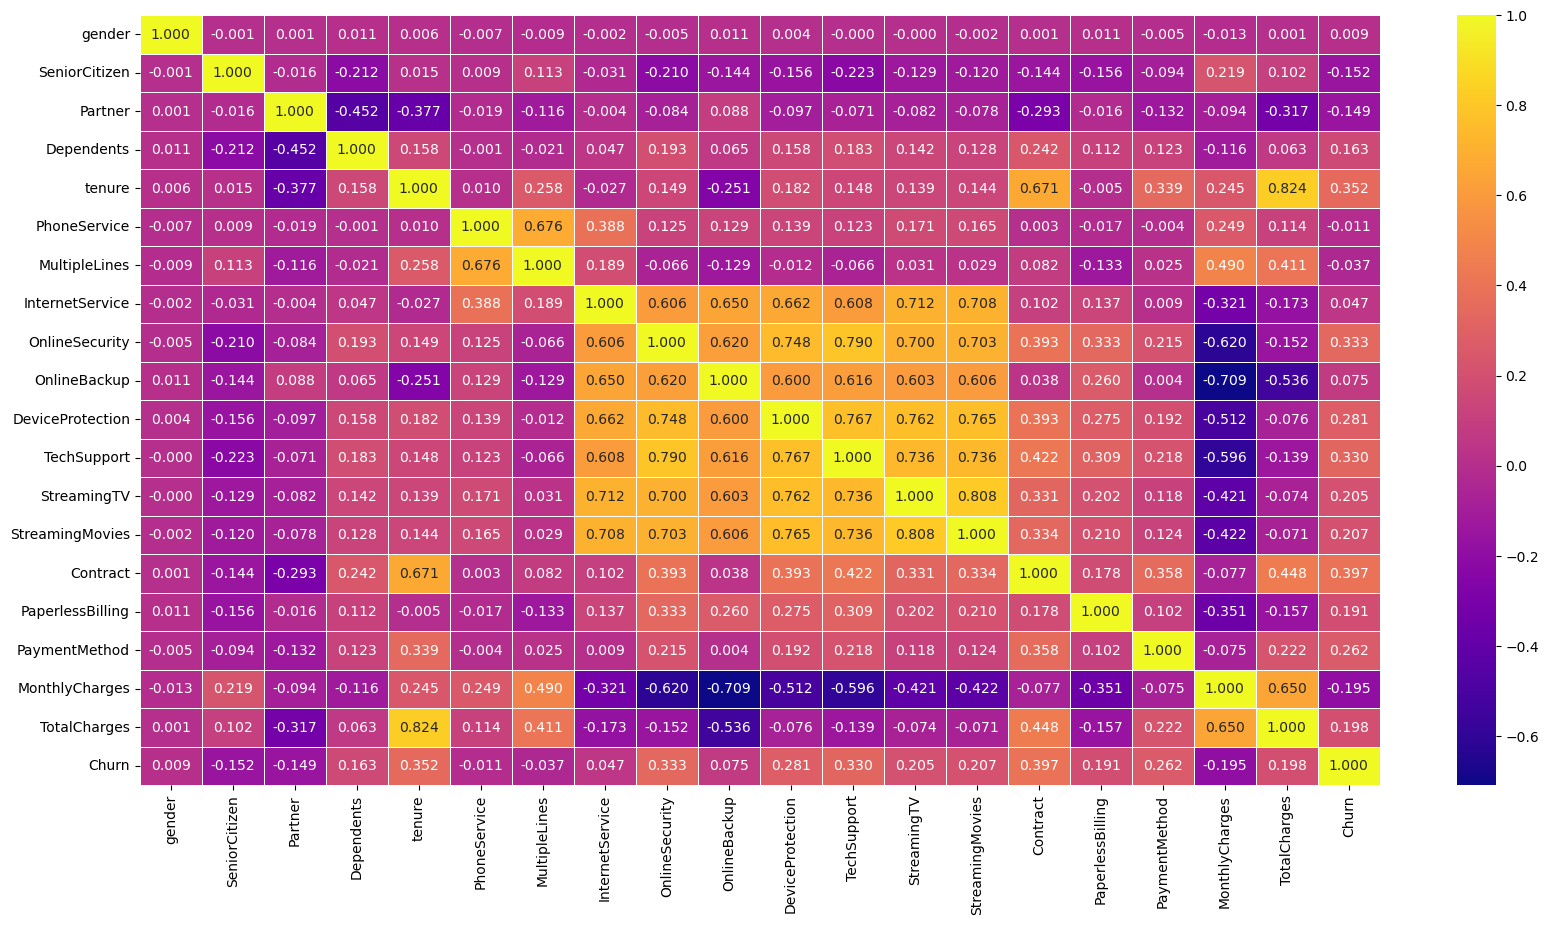

In [35]:
# Find correlation using Heat-map
plt.figure(figsize = (20,10)) 
sns.heatmap(data.corr(),
           annot = True,
           linewidth = .5,
           cmap = "plasma",
           fmt='.3f')

In [36]:
from scipy.stats import zscore # Importing z score
datascaled = data.apply(zscore)
datascaled.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,-1.008726,-0.440508,-1.031400,-0.655475,-1.282728,-3.048725,-2.060855,-1.181531,-0.902747,-1.178456,-0.997480,-0.908347,-1.071178,-1.077955,-0.830396,-0.829057,-1.145750,-1.164135,-0.998066,0.599671
1,0.991349,-0.440508,0.969556,-0.655475,0.062387,0.328006,-0.506691,-1.181531,0.354082,0.177039,0.288474,-0.908347,-1.071178,-1.077955,0.368496,1.206190,-0.276095,-0.262811,-0.176986,0.599671
2,0.991349,-0.440508,0.969556,-0.655475,-1.241967,0.328006,-0.506691,-1.181531,0.354082,-1.178456,-0.997480,-0.908347,-1.071178,-1.077955,-0.830396,-0.829057,-0.276095,-0.365914,-0.963495,-1.667582
3,0.991349,-0.440508,0.969556,-0.655475,0.510759,-3.048725,-2.060855,-1.181531,0.354082,0.177039,0.288474,0.350040,-1.071178,-1.077955,0.368496,1.206190,0.593561,-0.750058,-0.198510,0.599671
4,-1.008726,-0.440508,0.969556,-0.655475,-1.241967,0.328006,-0.506691,0.175278,-0.902747,0.177039,-0.997480,-0.908347,-1.071178,-1.077955,-0.830396,-0.829057,-1.145750,0.194503,-0.944289,-1.667582


In [37]:
# Using SMOTE for imbalanced data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 8)

In [38]:
y = data['Churn']
X = data.drop(['Churn'], axis=1)

In [39]:
XNew, yNew = sm.fit_resample(X,y)

<Axes: >

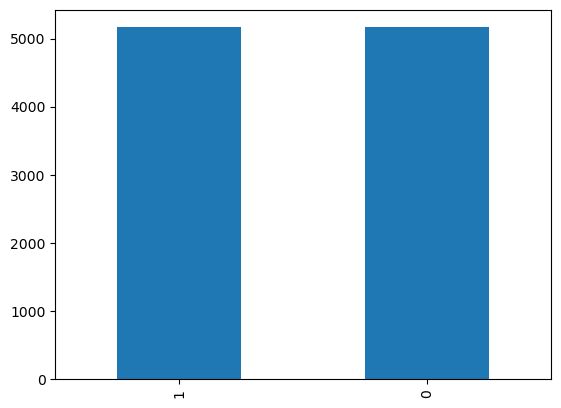

In [40]:
pd.Series(yNew).value_counts().plot(kind='bar')

In [42]:
from sklearn.model_selection import train_test_split # Split into training and test set

XTrain, XTest, YTrain, YTest = train_test_split(data.drop('Churn', axis=1), data['Churn'], test_size = .3,
                                               random_state = 8)
XTrain.shape, XTest.shape

((4914, 19), (2107, 19))

In [43]:
from sklearn.naive_bayes import GaussianNB # Implementing Naive Bayessian Classifier
gnb = GaussianNB()
GNBModel = gnb.fit(XTrain, YTrain)

In [45]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

TrSGNBPred = GNBModel.predict(XTrain)
TeSGNBPred = GNBModel.predict(XTest)
TrSAccGNB = accuracy_score(YTrain, TrSGNBPred)
TeSAccGNB = accuracy_score(YTest, TeSGNBPred)
TeSRecGNB = recall_score(YTest, TeSGNBPred)
TeSPreGNB = precision_score(YTest, TeSGNBPred)

TempResultsDf = pd.DataFrame({'Method': ['Gaussian NB'],
                              'TrainingAccuracy': [TrSAccGNB],
                              'TestAccuracy': TeSAccGNB,
                              'TestRecall': TeSRecGNB,
                              'TestPrecision': TeSPreGNB})

ResultsDf = TempResultsDf
print(ResultsDf)


        Method  TrainingAccuracy  TestAccuracy  TestRecall  TestPrecision
0  Gaussian NB          0.706146      0.719506    0.681641       0.911227
